# Thanksgiving 2015 Survey on FiveThirtyEight  

This tutorial is found on this [website](https://www.dataquest.io/blog/pandas-tutorial-python-2/). The data were taken from the online news FiveThirtyEight's article [Here’s What Your Part Of America Eats On Thanksgiving](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/).  

## I. Data Cleaning:

In [1]:
import pandas as pd

# The data is stored using Latin-1 encoding, so we additionally need to specify the encoding keyword argument.

thanksgiving = pd.read_csv("thanksgiving-2015-poll-data.csv", encoding="Latin-1")
thanksgiving.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [2]:
thanksgiving.shape

(1058, 65)

In [3]:
# I want to see what unique values are in the Do you celebrate Thanksgiving? column of data

thanksgiving["Do you celebrate Thanksgiving?"].unique()

array(['Yes', 'No'], dtype=object)

In [4]:
thanksgiving["What is typically the main dish at your Thanksgiving dinner?"].unique()

array(['Turkey', 'Tofurkey', 'Other (please specify)', nan, 'Ham/Pork',
       'Turducken', 'Roast beef', 'Chicken', "I don't know"], dtype=object)

In [5]:
# I want to view all the column names to see all of the survey questions

thanksgiving.columns[:]

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

## I.1. Clean up Gender:

In [6]:
# I want to know if there is missing data or not male/female response in the gender

thanksgiving["What is your gender?"].value_counts(dropna=False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

In [7]:
# I want to assign 0 to Male, and 1 to Female

import math

def gender_code(gender_string):
    if isinstance(gender_string, float) and math.isnan(gender_string):
        return gender_string
    return int(gender_string == "Female")

# This is a custom function that will do the transformation I want

thanksgiving["gender"] = thanksgiving["What is your gender?"].apply(gender_code)
thanksgiving["gender"].value_counts(dropna=False)

 1.0    544
 0.0    481
NaN      33
Name: gender, dtype: int64

## I.2. Clean up Income:

In [8]:
thanksgiving["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts(dropna=False)

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
NaN                      33
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

**Identify the patterns:**  
Looking at this, there are 4 different patterns for the values in the column:

1. X to Y
2. NaN
3. X and up
4. Prefer not to answer

I want  
X to Y = (X+Y)/2  
X and up = X  
Prefer not to answer = NaN

The custom function will do

1. Take a string called value as input.
2. Check to see if value is 200,000 and up, and return 200000 if so.
3. Check if value is Prefer not to answer, and return NaN if so.
4. Check if value is NaN, and return NaN if so.
5. Clean up value by removing any dollar signs or commas.
6. Split the string to extract the incomes, then average them.

In [9]:
import numpy as np

def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    value = value.replace(",", "").replace("$", "")
    income_high, income_low = value.split(" to ")
    return (int(income_high) + int(income_low)) / 2

In [10]:
# apply the function above to Income

thanksgiving["income"] = thanksgiving["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)
thanksgiving["income"].value_counts(dropna=False)

 37499.5     180
NaN          169
 62499.5     135
 87499.5     133
 112499.5    111
 200000.0     80
 17499.5      68
 4999.5       66
 137499.5     49
 162499.5     40
 187499.5     27
Name: income, dtype: int64

## II. Grouping data from the same column:  

## II.1. Method 1:

In [11]:
# I want to compare income between
# people who tend to eat homemade cranberry sauce for Thanksgiving vs people who eat canned cranberry sauce

thanksgiving["What type of cranberry saucedo you typically have?"].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [15]:
homemade = thanksgiving[thanksgiving["What type of cranberry saucedo you typically have?"] == "Homemade"]
canned = thanksgiving[thanksgiving["What type of cranberry saucedo you typically have?"] == "Canned"]

In [16]:
homemade.mean()

RespondentID                                                                   4.336792e+09
What type of cranberry saucedo you typically have? - Other (please specify)             NaN
gender                                                                         5.331010e-01
income                                                                         9.487811e+04
dtype: float64

In [17]:
print(homemade["income"].mean())
print(canned["income"].mean())

94878.1072874494
83823.40340909091


## II.2. groupby and aggregate method:

In [20]:
cranberry_sauce = thanksgiving.groupby("What type of cranberry saucedo you typically have?")
cranberry_sauce

In [21]:
# I want to see what inside cranberry_sauce is

cranberry_sauce.groups

{'Canned': Int64Index([   4,    6,    8,   11,   12,   15,   18,   19,   26,   27,
             ...
             1040, 1041, 1042, 1044, 1045, 1046, 1047, 1051, 1054, 1057],
            dtype='int64', length=502),
 'Homemade': Int64Index([   2,    3,    5,    7,   13,   14,   16,   20,   21,   23,
             ...
             1016, 1017, 1025, 1027, 1030, 1034, 1048, 1049, 1053, 1056],
            dtype='int64', length=301),
 'None': Int64Index([   0,   17,   24,   29,   34,   36,   40,   47,   49,   51,
             ...
              980,  981,  997, 1015, 1018, 1031, 1037, 1043, 1050, 1055],
            dtype='int64', length=146),
 'Other (please specify)': Int64Index([   1,    9,  154,  216,  221,  233,  249,  265,  301,  336,  380,
              435,  444,  447,  513,  550,  749,  750,  784,  807,  860,  872,
              905, 1000, 1007],
            dtype='int64')}

In [22]:
# I want to know how many rows are in each group

cranberry_sauce.size()

# This is equavalent to .value_counts()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [24]:
# I want to know number of rows and columns for each group

for name, group in cranberry_sauce:
    print(name)
    print(group.shape)
    print(type(group))

Canned
(502, 67)
<class 'pandas.core.frame.DataFrame'>
Homemade
(301, 67)
<class 'pandas.core.frame.DataFrame'>
None
(146, 67)
<class 'pandas.core.frame.DataFrame'>
Other (please specify)
(25, 67)
<class 'pandas.core.frame.DataFrame'>


In [25]:
# I want to see the first few row of income for each group

cranberry_sauce["income"].head()

0       87499.5
1       62499.5
2        4999.5
3      200000.0
4      112499.5
5        4999.5
6       37499.5
7           NaN
8       87499.5
9       37499.5
10      37499.5
11      37499.5
12       4999.5
13       4999.5
17      87499.5
22       4999.5
24      62499.5
29      87499.5
31          NaN
34      37499.5
35      37499.5
41       4999.5
154    112499.5
216     62499.5
221    137499.5
Name: income, dtype: float64

In [26]:
cranberry_sauce["income"].size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: income, dtype: int64

In [27]:
cranberry_sauce["income"].describe()

,count,mean,std,min,25%,50%,75%,max
What type of cranberry saucedo you typically have?,,,,,,,,
Canned,440.0,83823.403409,55835.478014,4999.5,37499.5,62499.5,112499.5,200000.0
Homemade,247.0,94878.107287,62251.937645,4999.5,37499.5,87499.5,137499.5,200000.0
None,119.0,78886.084034,54562.750866,4999.5,37499.5,62499.5,112499.5,200000.0
Other (please specify),23.0,86629.978261,54175.781001,17499.5,37499.5,87499.5,112499.5,200000.0


In [28]:
# The real power of groups is in the computations we can do after creating groups.
# pandas.GroupBy.aggregate method

cranberry_sauce["income"].agg(np.mean)

# This will compute the mean for each group, then combine the results from each group.

What type of cranberry saucedo you typically have?
Canned                    83823.403409
Homemade                  94878.107287
None                      78886.084034
Other (please specify)    86629.978261
Name: income, dtype: float64

What type of cranberry saucedo you typically have?
Canned                    AxesSubplot(0.125,0.125;0.775x0.755)
Homemade                  AxesSubplot(0.125,0.125;0.775x0.755)
None                      AxesSubplot(0.125,0.125;0.775x0.755)
Other (please specify)    AxesSubplot(0.125,0.125;0.775x0.755)
Name: income, dtype: object

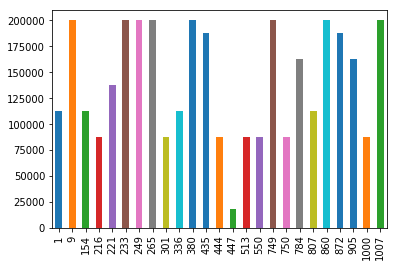

In [29]:
%matplotlib inline

cranberry_sauce["income"].plot(kind="bar")

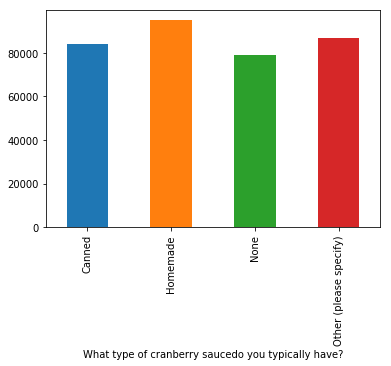

In [30]:
cranberry_sauce["income"].agg(np.mean).plot(kind="bar")

In [33]:
# I will do this for practice:

main_dish = thanksgiving.groupby("What is typically the main dish at your Thanksgiving dinner?")
main_dish.groups

{'Chicken': Int64Index([397, 445, 477, 649, 779, 788, 828, 866, 876, 880, 883, 934], dtype='int64'),
 'Ham/Pork': Int64Index([  12,   39,   73,   94,  126,  248,  307,  310,  337,  339,  373,
              446,  472,  516,  553,  568,  573,  580,  595,  613,  677,  746,
              750,  753,  810,  863,  973, 1013, 1031],
            dtype='int64'),
 "I don't know": Int64Index([647, 843, 884, 941, 1023], dtype='int64'),
 'Other (please specify)': Int64Index([   9,   28,   30,   55,   61,   98,  105,  148,  221,  228,  242,
              249,  365,  430,  460,  480,  483,  495,  537,  581,  612,  708,
              719,  726,  742,  744,  751,  818,  845,  850,  853,  923, 1015,
             1037, 1055],
            dtype='int64'),
 'Roast beef': Int64Index([92, 654, 727, 816, 819, 827, 832, 846, 856, 956, 1022], dtype='int64'),
 'Tofurkey': Int64Index([  4,  33,  69,  72,  77, 145, 175, 218, 243, 275, 393, 399, 571,
             594, 628, 774, 820, 837, 860, 953],
            dtype=

In [34]:
# I want to see the mean income of respondents within each group

main_dish["income"].describe()

,count,mean,std,min,25%,50%,75%,max
What is typically the main dish at your Thanksgiving dinner?,,,,,,,,
Chicken,10.0,48749.550000,61534.341135,4999.5,17499.5,27499.5,37499.5,200000.0
Ham/Pork,27.0,75925.462963,53250.893817,4999.5,37499.5,87499.5,87499.5,200000.0
I don't know,3.0,24166.166667,33197.640478,4999.5,4999.5,4999.5,33749.5,62499.5
Other (please specify),31.0,90402.758065,57843.590504,17499.5,37499.5,87499.5,124999.5,200000.0
Roast beef,8.0,44687.000000,53492.948467,4999.5,4999.5,27499.5,62499.5,162499.5
Tofurkey,17.0,83970.117647,59451.057247,4999.5,37499.5,87499.5,112499.5,200000.0
Turducken,2.0,200000.000000,0.000000,200000.0,200000.0,200000.0,200000.0,200000.0
Turkey,731.0,87687.645007,57433.112063,4999.5,37499.5,87499.5,112499.5,200000.0


In [35]:
# I want to know the mean income only

main_dish["income"].agg(np.mean)

What is typically the main dish at your Thanksgiving dinner?
Chicken                    48749.550000
Ham/Pork                   75925.462963
I don't know               24166.166667
Other (please specify)     90402.758065
Roast beef                 44687.000000
Tofurkey                   83970.117647
Turducken                 200000.000000
Turkey                     87687.645007
Name: income, dtype: float64

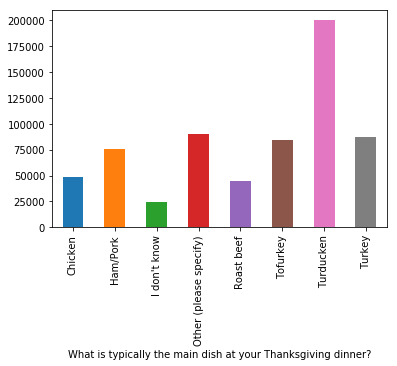

In [36]:
main_dish["income"].agg(np.mean).plot(kind="bar")

## II.3. Aggregating with multiple columns:

I can call groupby with multiple columns as input to get more granular groups.

In [38]:
# cs_and_md stands for cranberry_sauce and main_dish

cs_and_md = thanksgiving.groupby(["What type of cranberry saucedo you typically have?", "What is typically the main dish at your Thanksgiving dinner?"])
cs_and_md.agg(np.mean)

RespondentID  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                             4.336354e+09   
                                                   Ham/Pork                                            4.336757e+09   
                                                   I don't know                                        4.335987e+09   
                                                   Other (please specify)                              4.336682e+09   
                                                   Roast beef                                          4.336254e+09   
                                                   Tofurkey                                            4.337157e+09   
                                                   Turkey                                              4.336705e+09   
Homemade                                           Chicken                                             4.336540e+09   
                                                   Ham/Pork                                            4.337253e+09   
                                                   I don't know                                        4.336084e+09   
                                                   Other (please specify)                              4.336863e+09   
                                                   Roast beef                                          4.336174e+09   
                                                   Tofurkey                                            4.336790e+09   
                                                   Turducken                                           4.337475e+09   
                                                   Turkey                                              4.336791e+09   
None                                               Chicken                                             4.336151e+09   
                                                   Ham/Pork                                            4.336680e+09   
                                                   I don't know                                        4.336412e+09   
                                                   Other (please specify)                              4.336688e+09   
                                                   Roast beef                                          4.337424e+09   
                                                   Tofurkey                                            4.336950e+09   
                                                   Turducken                                           4.336739e+09   
                                                   Turkey                                              4.336784e+09   
Other (please specify)                             Ham/Pork                                            4.336465e+09   
                                                   Other (please specify)                              4.337335e+09   
                                                   Tofurkey                                            4.336122e+09   
                                                   Turkey                                              4.336724e+09   

                                                                                                         gender  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...             
Canned                                             Chicken                                             0.333333   
                                                   Ham/Pork                                            0.642857   
                                                   I don't know                                        0.000000   
                                                   Other (please specify)   

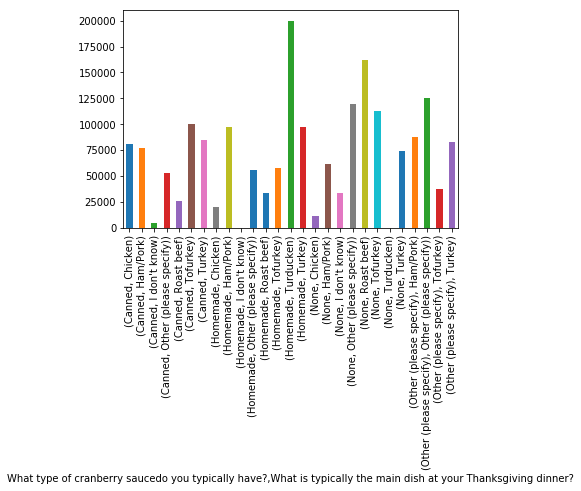

In [39]:
cs_and_md["income"].agg(np.mean).plot(kind="bar")

In [43]:
cs_and_md["income"].describe()

count  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...          
Canned                                             Chicken                                               5.0   
                                                   Ham/Pork                                             14.0   
                                                   I don't know                                          1.0   
                                                   Other (please specify)                                7.0   
                                                   Roast beef                                            5.0   
                                                   Tofurkey                                              7.0   
                                                   Turkey                                              401.0   
Homemade                                           Chicken                                               3.0   
                                                   Ham/Pork                                              4.0   
                                                   I don't know                                          0.0   
                                                   Other (please specify)                                7.0   
                                                   Roast beef                                            2.0   
                                                   Tofurkey                                              6.0   
                                                   Turducken                                             2.0   
                                                   Turkey                                              223.0   
None                                               Chicken                                               2.0   
                                                   Ham/Pork                                              8.0   
                                                   I don't know                                          2.0   
                                                   Other (please specify)                               14.0   
                                                   Roast beef                                            1.0   
                                                   Tofurkey                                              3.0   
                                                   Turducken                                             0.0   
                                                   Turkey                                               89.0   
Other (please specify)                             Ham/Pork                                              1.0   
                                                   Other (please specify)                                3.0   
                                                   Tofurkey                                              1.0   
                                                   Turkey                                               18.0   

                                                                                                                mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              80999.600000   
                                                   Ham/Pork                                             77499.535714   
                                                   I don't know                                          4999.500000   
                                                   Other (please specify)                               53213.785714   
                                                   Roast beef                                           25499.500000   
              

In [45]:
cs_and_md["income"].agg([np.median, np.mean, np.std])

median  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...             
Canned                                             Chicken                                              37499.5   
                                                   Ham/Pork                                             74999.5   
                                                   I don't know                                          4999.5   
                                                   Other (please specify)                               62499.5   
                                                   Roast beef                                           17499.5   
                                                   Tofurkey                                            112499.5   
                                                   Turkey                                               62499.5   
Homemade                                           Chicken                                              17499.5   
                                                   Ham/Pork                                             74999.5   
                                                   I don't know                                             NaN   
                                                   Other (please specify)                               37499.5   
                                                   Roast beef                                           33749.5   
                                                   Tofurkey                                             49999.5   
                                                   Turducken                                           200000.0   
                                                   Turkey                                               87499.5   
None                                               Chicken                                              11249.5   
                                                   Ham/Pork                                             74999.5   
                                                   I don't know                                         33749.5   
                                                   Other (please specify)                              112499.5   
                                                   Roast beef                                          162499.5   
                                                   Tofurkey                                            112499.5   
                                                   Turducken                                                NaN   
                                                   Turkey                                               62499.5   
Other (please specify)                             Ham/Pork                                             87499.5   
                                                   Other (please specify)                              137499.5   
                                                   Tofurkey                                             37499.5   
                                                   Turkey                                               74999.5   

                                                                                                                mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              80999.600000   
                                                   Ham/Pork                                             77499.535714   
                                                   I don't know                                          4999.500000   
                                                   Other (please specify)                               53213.785714   
                                                 

In [46]:
# I want to know where people live and what main dish they have

location_and_md = thanksgiving.groupby(["How would you describe where you live?", "What is typically the main dish at your Thanksgiving dinner?"])
location_and_md.groups

{('Suburban',
  'Turkey'): Int64Index([   0,    2,   11,   15,   18,   24,   27,   37,   38,   42,
             ...
             1035, 1038, 1039, 1040, 1043, 1044, 1045, 1048, 1051, 1054],
            dtype='int64', length=449),
 ('Rural',
  'Turkey'): Int64Index([   1,    6,    7,   14,   19,   25,   44,   47,   51,   53,
             ...
              994,  998,  999, 1003, 1010, 1021, 1041, 1042, 1050, 1053],
            dtype='int64', length=189),
 ('Urban',
  'Turkey'): Int64Index([   3,    5,    8,   13,   17,   20,   21,   23,   26,   29,
             ...
              991,  992,  997, 1016, 1017, 1019, 1025, 1033, 1046, 1047],
            dtype='int64', length=198),
 ('Urban',
  'Tofurkey'): Int64Index([4, 69, 77, 145, 243, 275, 820, 860], dtype='int64'),
 ('Suburban',
  'Other (please specify)'): Int64Index([9, 61, 228, 480, 483, 495, 537, 708, 719, 742, 744, 751, 1037], dtype='int64'),
 (nan,
  nan): Int64Index([  10,   22,   31,   35,   41,   45,   50,   63,   65,   75,   8

In [47]:
location_and_md.size()

How would you describe where you live?  What is typically the main dish at your Thanksgiving dinner?
Rural                                   Chicken                                                           2
                                        Ham/Pork                                                          7
                                        I don't know                                                      3
                                        Other (please specify)                                            9
                                        Roast beef                                                        1
                                        Tofurkey                                                          3
                                        Turducken                                                         2
                                        Turkey                                                          189
Suburban                           